In [1]:
import numpy as np
import netCDF4
import os
import pickle
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def pickle_save(name, path, data, verbose=True):
    if not os.path.exists(path):
        os.makedirs(path)
    full_name = (os.path.join(path,name+ '.npy'))


    with open(full_name, 'wb') as f2:
        pickle.dump(data, f2)
    if verbose:
        print('saved at : ',full_name)
        
def pickle_load(name, path, verbose=True):
    #if not os.path.exists(path):
    #    os.makedirs(path)
    full_name= (os.path.join(path,name+ '.npy'))

    with open(full_name, 'r') as f:
        data=pickle.load(f)

    if verbose:
        print('loaded from : ',full_name)
    return data

In [3]:
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
load_path3='/data/soccom/GRID_12/'

In [4]:
# Load files
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')

# Mercator grid for salinity with domain of validation of model
lon_min = 1800
lon_max = 3240
lat_min = 0
lat_max = 1170

lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][lon_min:lon_max]
Lon, Lat = np.meshgrid(lon,lat)

# These are the indexes when taking the same size as in Matlab

lon_min   = 1440 
lon_max   = 3241 # 3240 si comme dans Traj_big_domain
lat_min   = 0 
lat_max   = 1024 # 1023 si comme dans Traj_big_domain

# 
YC        = file1.variables['lat'][lat_min:lat_max] # de -77,99 a -40,11
XC        = file1.variables['lon'][lon_min:lon_max] # de 120,04 a 269,95
XC, YC = np.meshgrid(XC,YC)

# This is hFacC for the SOUTHERN HEMISPHERE

file_h = h5py.File(load_path3 + 'grid.mat','r')

hFacC = file_h.get('hFacC')
hFacC = np.array(hFacC)
Xf = file_h.get('XC')
Xf = np.array(Xf)
Yf = file_h.get('YC')
Yf = np.array(Yf)

hfacc = hFacC[:, lat_min:lat_max, lon_min:lon_max]

In [5]:
# Mercator salinity
mean_Salt_surf = pickle_load('mean_Salt_surf_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Salt_30     = pickle_load('mean_Salt_30_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Salt_100   = pickle_load('mean_Salt_100_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Salt_200   = pickle_load('mean_Salt_200_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Salt_500   = pickle_load('mean_Salt_500_2', '/data/ebent/Bigger_domain/', verbose=False)

# Mercator temperature
mean_Theta_surf = pickle_load('mean_Theta_surf_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Theta_30     = pickle_load('mean_Theta_30_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Theta_100   = pickle_load('mean_Theta_100_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Theta_200   = pickle_load('mean_Theta_200_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Theta_500   = pickle_load('mean_Theta_500_2', '/data/ebent/Bigger_domain/', verbose=False)

In [6]:
Uvel_list_names = ['so12_i0_year2006_5day_Uvel.nc', 
                   'so12_i0_year2007_5day_Uvel.nc', 
                   'so12_i0_year2008_5day_Uvel.nc', 
                   'so12_i0_year2009_5day_Uvel.nc', 
                   'so12_i0_year2010_5day_Uvel.nc', 
                   'so12_i0_year2011_5day_Uvel.nc']

Vvel_list_names = ['so12_i0_year2006_5day_Vvel.nc', 
                   'so12_i0_year2007_5day_Vvel.nc', 
                   'so12_i0_year2008_5day_Vvel.nc', 
                   'so12_i0_year2009_5day_Vvel.nc', 
                   'so12_i0_year2010_5day_Vvel.nc', 
                   'so12_i0_year2011_5day_Vvel.nc']

***

# Below it calculates mean_Uvel and mean_Vvel for 5 depths

### Change d to choose the depth and also the name of the variable to save in the pickle save

In [7]:
depth_list = [0,9,24,39,59]

In [8]:
d = 59

In [9]:
mean_uvel = np.ma.masked_all((104,1024,1801))
tmp1 = np.ma.masked_all((1024,1801))

In [ ]:
for name in Uvel_list_names:
        uvel = netCDF4.Dataset(load_path2 + str(name),'r')
        print name
        if name == 'so12_i0_year2006_5day_Uvel.nc':
                tmp1 = np.ma.mean(uvel.variables['Uvel'][19:,d,lat_min_m:lat_max_m, lon_min_m:lon_max_m], axis=0)
        else:
                tmp1 = tmp1 + np.ma.mean(uvel.variables['Uvel'][:,d,lat_min_m:lat_max_m, lon_min_m:lon_max_m], axis=0)
        mean_uvel[d] = tmp1/6

In [ ]:
mean_vvel = np.ma.masked_all((104,1024,1801))
tmp1 = np.ma.masked_all((1024,1801))

for name in Vvel_list_names:
        vvel = netCDF4.Dataset(load_path2 + str(name),'r')
        print name
        if name == 'so12_i0_year2006_5day_Vvel.nc':
                tmp1 = np.ma.mean(vvel.variables['Vvel'][19:,d,lat_min_m:lat_max_m, lon_min_m:lon_max_m], axis=0)
        else:
                tmp1 = tmp1 + np.ma.mean(vvel.variables['Vvel'][:,d,lat_min_m:lat_max_m, lon_min_m:lon_max_m], axis=0)
        mean_vvel[d] = tmp1/6

In [ ]:
# Save, don't forget to change d and name
pickle_save('mean_Uvel_500', '/data/ebent/', mean_uvel[d])
pickle_save('mean_Vvel_500', '/data/ebent/', mean_vvel[d])

***

# Load

In [7]:
mean_Uvel_surf = pickle_load('mean_Uvel_surf', '/data/ebent/', verbose=False)
mean_Vvel_surf = pickle_load('mean_Vvel_surf', '/data/ebent/', verbose=False)

mean_Uvel_30 =   pickle_load('mean_Uvel_30', '/data/ebent/', verbose=False)
mean_Vvel_30 =   pickle_load('mean_Vvel_30', '/data/ebent/', verbose=False)

mean_Uvel_100 = pickle_load('mean_Uvel_100', '/data/ebent/', verbose=False)
mean_Vvel_100 = pickle_load('mean_Vvel_100', '/data/ebent/', verbose=False)

mean_Uvel_200 = pickle_load('mean_Uvel_200', '/data/ebent/', verbose=False)
mean_Vvel_200 = pickle_load('mean_Vvel_200', '/data/ebent/', verbose=False)

mean_Uvel_500 = pickle_load('mean_Uvel_500', '/data/ebent/', verbose=False)
mean_Vvel_500 = pickle_load('mean_Vvel_500', '/data/ebent/', verbose=False)

In [8]:
SF = pickle_load('SF_2', '/data/ebent/')

('loaded from : ', '/data/ebent/SF_2.npy')


In [9]:
norm_surf = np.sqrt(mean_Uvel_surf**2 + mean_Vvel_surf**2)
norm_30   = np.sqrt(mean_Uvel_30**2   + mean_Vvel_30**2)
norm_100  = np.sqrt(mean_Uvel_100**2  + mean_Vvel_100**2)
norm_200  = np.sqrt(mean_Uvel_200**2  + mean_Vvel_200**2)
norm_500  = np.sqrt(mean_Uvel_500**2  + mean_Vvel_500**2)

In [18]:
def background_SF(proj, background, field, hfacc_level, title_fig, color):
    
    import matplotlib.pyplot as plt
    import numpy as np
    from mpl_toolkits.basemap import Basemap
    import cmocean
    
    #fig     = plt.figure(figsize=(80,40))
    #nb_fig = nb_l*nb_c
    #T_or_S_field = pickle_load(T_or_S_field, '/data/ebent', verbose=False)
    #for i in range(5):
        
    #plt.subplot(nb_l, nb_c, i+1)
        
    if proj=='ortho':
        m       = Basemap(projection='ortho', lat_0=-90, lon_0=0, resolution="h")
    elif proj=='merc':
        m       = Basemap(projection='merc',llcrnrlat=-78.,urcrnrlat=-40.,llcrnrlon=120.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
    elif proj=='lamb':
        m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-60.,rsphere=(6378137.00,6356752.3142),resolution='l',area_thresh=1000.,projection='lcc',lat_1=65.,lon_0=180.)
    
    # Plot the continents thanks to hFacC==0, choose the level : 0=surf, 9=30m
    xm, ym  = m(Xf, Yf)
    im      = m.contourf(xm, ym, hFacC[hfacc_level,...], extend='both', cmap='Greys_r')
    
    # Plot the background
    if background == 'speed':
        xm, ym  = m(XC, YC)
        im      = m.contourf(xm, ym, field, levels=np.linspace(np.nanmin(field), np.nanmax(field),50), extend='both', cmap=cmocean.cm.speed)
        cbar    = m.colorbar(im,pad='10%')
        cbar.set_label('Speed [m/s]', fontsize =16)
        
    elif background == 'salt':
        xm, ym  = m(XC, YC)
        im      = m.contourf(xm, ym, field, levels=np.linspace(field.min(),field.max(),50), extend='both', cmap=cmocean.cm.haline)
        cbar    = m.colorbar(im,pad='10%')
        cbar.set_label('Salinity', fontsize =16)
        
    elif background == 'temp':  
        xm, ym  = m(XC, YC)
        im      = m.contourf(xm, ym, field, levels=np.linspace(field.min(),field.max(),35), extend='both', cmap=cmocean.cm.thermal)
        cbar    = m.colorbar(im,pad='10%')
        cbar.set_label('Temperature [$^\circ$C]', fontsize =16)
    
    # Plot the stream function
    xm, ym  = m(XC, YC)
    cs      = m.contour(xm, ym, SF, extend='both', levels=np.linspace(np.nanmin(SF), np.nanmax(SF), 10), colors=color, linewidth=0.3)
    plt.clabel(cs, inline=True, fontsize=8)
    
    # Plot the salinity or temperature
    #xm, ym  = m(Lon, Lat)
    #im      = m.contourf(xm, ym, T_or_S_field, levels=np.linspace(T_or_S_field.min(),T_or_S_field.max(),50), extend='both', cmap=cmap)
    #cbar    = m.colorbar(im,pad='10%')
    #cbar.set_label(cbar_title, fontsize =16)
    

    #cs      = m.contour(xm, ym, speed, extend='both', levels=np.linspace(np.nanmin(field), np.nanmax(field), 10), colors=color, linewidth=0.3)
    #plt.clabel(cs, inline=True, fontsize=8)
        
    m.drawparallels(np.arange(-80.,-30.,10), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(120.,280.,10), labels=[0, 0, 0, 1], labelstyle='+/-')
    plt.title(title_fig, fontsize=18)
    plt.savefig('/home/ebent/Final_figs/' + 'S_200m_SF.eps', format='eps', dpi=300, bbox_inches='tight')
    m.fillcontinents(color='k', lake_color='k')    
    #fig.tight_layout()

***

# For plotting en-tête of my poster

In [15]:
def background_SF(proj, background, field, hfacc_level, title_fig, color):
    
    import matplotlib.pyplot as plt
    import numpy as np
    from mpl_toolkits.basemap import Basemap
    import cmocean
    
    fig     = plt.figure(figsize=(80,40))
    #nb_fig = nb_l*nb_c
    #T_or_S_field = pickle_load(T_or_S_field, '/data/ebent', verbose=False)
    #for i in range(5):
        
    #plt.subplot(nb_l, nb_c, i+1)
        
    if proj=='ortho':
        m       = Basemap(projection='ortho', lat_0=-90, lon_0=0, resolution="h")
    elif proj=='merc':
        m       = Basemap(projection='merc',llcrnrlat=-78.,urcrnrlat=-40.,llcrnrlon=120.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
    elif proj=='lamb':
        m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-60.,rsphere=(6378137.00,6356752.3142),resolution='l',area_thresh=1000.,projection='lcc',lat_1=65.,lon_0=180.)
    
    # Plot the continents thanks to hFacC==0, choose the level : 0=surf, 9=30m
    xm, ym  = m(Xf, Yf)
    im      = m.contourf(xm, ym, hFacC[hfacc_level,...], extend='both', cmap='Greys_r')
    
    # Plot the background
    if background == 'speed':
        xm, ym  = m(XC, YC)
        im      = m.contourf(xm, ym, field, levels=np.linspace(np.nanmin(field), np.nanmax(field),50), extend='both', cmap=cmocean.cm.speed)
        cbar    = m.colorbar(im,pad='10%')
        cbar.set_label('Speed [m/s]', fontsize =16)
        
    elif background == 'salt':
        xm, ym  = m(XC, YC)
        im      = m.contourf(xm, ym, field, levels=np.linspace(field.min(),field.max(),50), extend='both', cmap=cmocean.cm.haline)
        #cbar    = m.colorbar(im,pad='10%')
        #cbar.set_label('Salinity', fontsize =16)
        
    elif background == 'temp':  
        xm, ym  = m(XC, YC)
        im      = m.contourf(xm, ym, field, levels=np.linspace(field.min(),field.max(),35), extend='both', cmap=cmocean.cm.thermal)
        cbar    = m.colorbar(im,pad='10%')
        cbar.set_label('Temperature [$^\circ$C]', fontsize =16)
    
    # Plot the stream function
    #xm, ym  = m(XC, YC)
    #cs      = m.contour(xm, ym, SF, extend='both', levels=np.linspace(np.nanmin(SF), np.nanmax(SF), 10), colors=color, linewidth=0.3)
    #plt.clabel(cs, inline=True, fontsize=8)
    
    # Plot the salinity or temperature
    #xm, ym  = m(Lon, Lat)
    #im      = m.contourf(xm, ym, T_or_S_field, levels=np.linspace(T_or_S_field.min(),T_or_S_field.max(),50), extend='both', cmap=cmap)
    #cbar    = m.colorbar(im,pad='10%')
    #cbar.set_label(cbar_title, fontsize =16)
    

    #cs      = m.contour(xm, ym, speed, extend='both', levels=np.linspace(np.nanmin(field), np.nanmax(field), 10), colors=color, linewidth=0.3)
    #plt.clabel(cs, inline=True, fontsize=8)
        
    #m.drawparallels(np.arange(-80.,-30.,10), labels=[1, 0, 0, 0])
    #m.drawmeridians(np.arange(120.,280.,10), labels=[0, 0, 0, 1], labelstyle='+/-')
    #plt.title(title_fig, fontsize=18)
    plt.savefig('/home/ebent/Final_figs/' + 'S_200m_SF.eps', format='eps', dpi=300, bbox_inches='tight')
    m.fillcontinents(color='k', lake_color='k')    
    #fig.tight_layout()

In [ ]:
#plt.figure(figsize=(12,10))
background_SF(proj='merc', background='salt', field=mean_Salt_200, hfacc_level=39, title_fig='Salinity and SF plot at 200 m', color='k')

***

/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


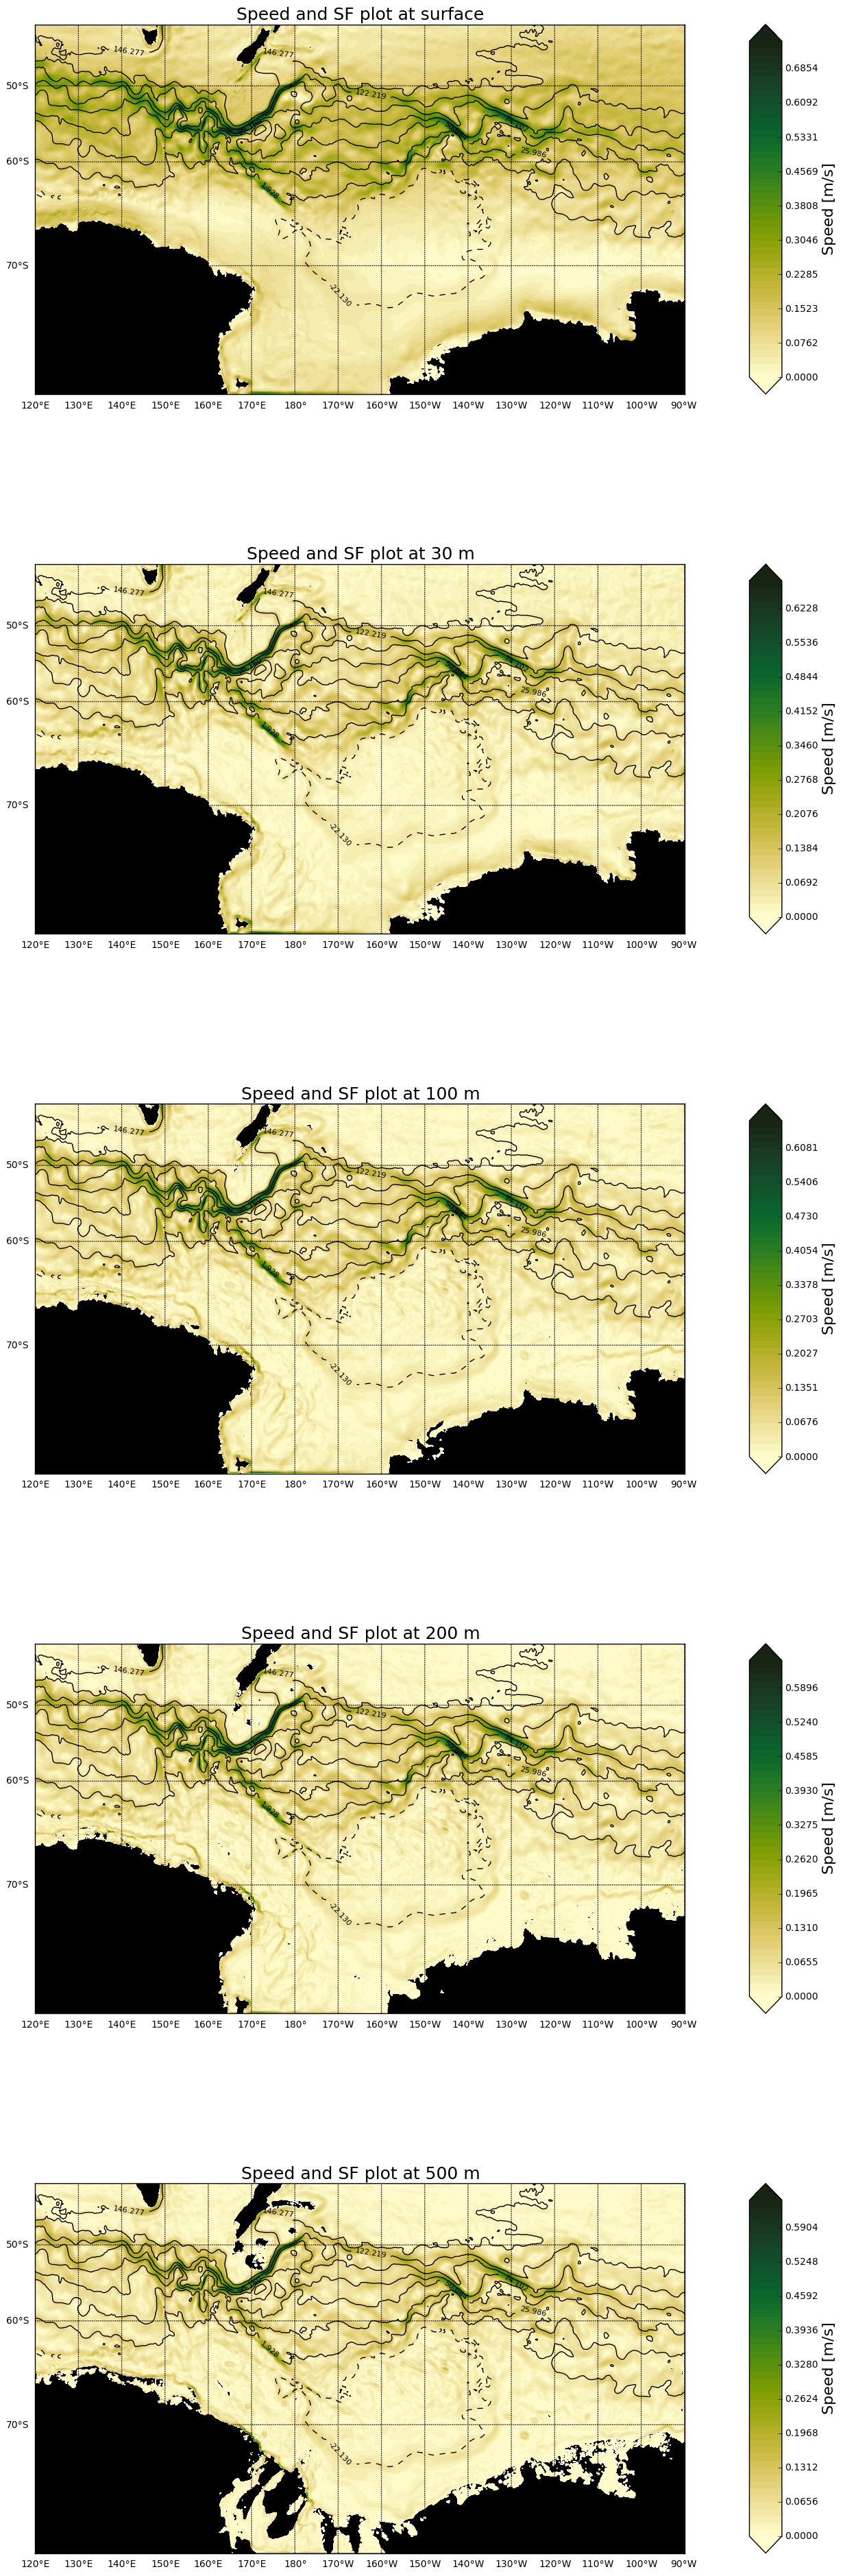

In [10]:
fig     = plt.figure(figsize=(12,40))

plt.subplot(5,1,1)
background_SF(proj='merc', background='speed', field=norm_surf, hfacc_level=0, title_fig='Speed and SF plot at surface', color='k')
plt.subplot(5,1,2)
background_SF(proj='merc', background='speed', field=norm_30,   hfacc_level=9, title_fig='Speed and SF plot at 30 m', color='k')
plt.subplot(5,1,3)
background_SF(proj='merc', background='speed', field=norm_100, hfacc_level=24, title_fig='Speed and SF plot at 100 m', color='k')
plt.subplot(5,1,4)
background_SF(proj='merc', background='speed', field=norm_200, hfacc_level=39, title_fig='Speed and SF plot at 200 m', color='k')
plt.subplot(5,1,5)
background_SF(proj='merc', background='speed', field=norm_500, hfacc_level=59, title_fig='Speed and SF plot at 500 m', color='k')

fig.tight_layout()

/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


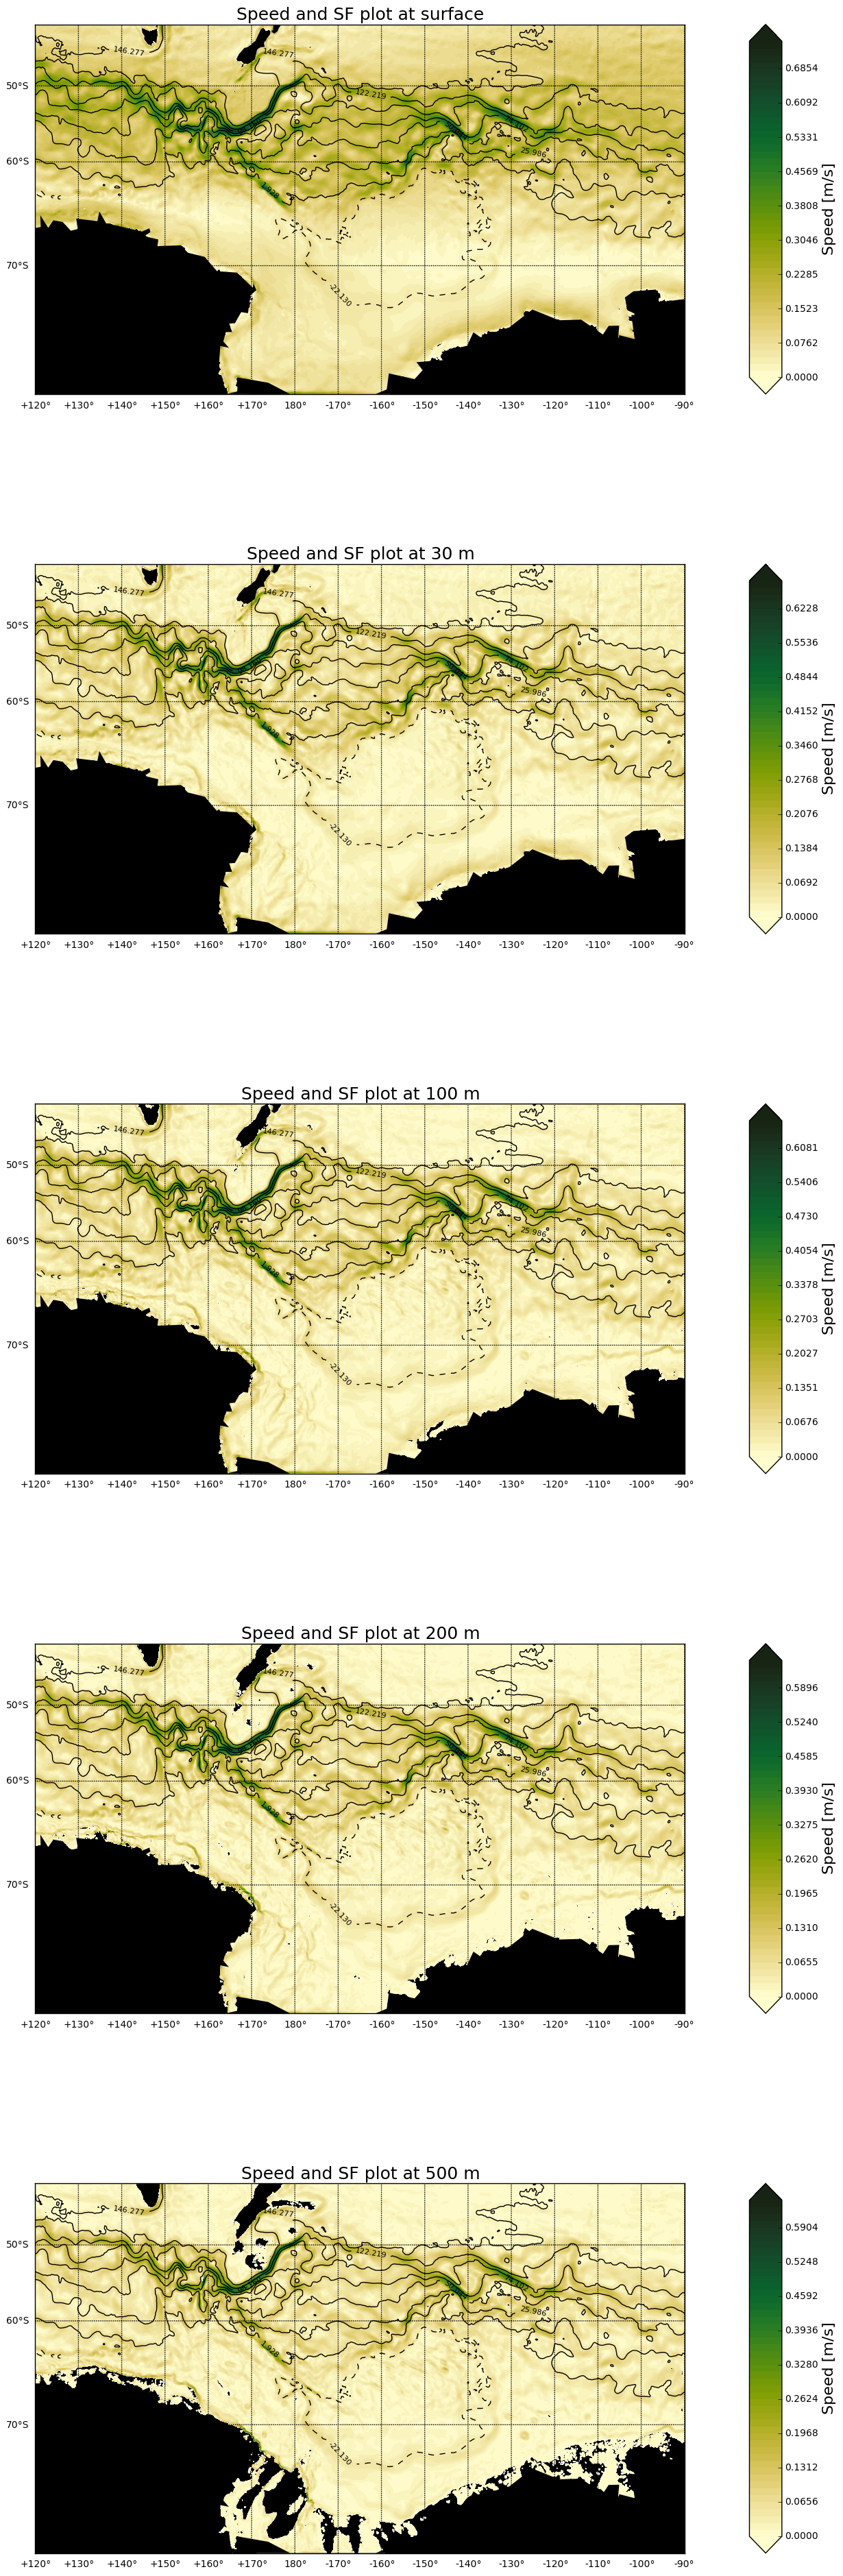

In [19]:
fig     = plt.figure(figsize=(12,40))

plt.subplot(5,1,1)
background_SF(proj='merc', background='speed', field=norm_surf, hfacc_level=0, title_fig='Speed and SF plot at surface', color='k')
plt.subplot(5,1,2)
background_SF(proj='merc', background='speed', field=norm_30,   hfacc_level=9, title_fig='Speed and SF plot at 30 m', color='k')
plt.subplot(5,1,3)
background_SF(proj='merc', background='speed', field=norm_100, hfacc_level=24, title_fig='Speed and SF plot at 100 m', color='k')
plt.subplot(5,1,4)
background_SF(proj='merc', background='speed', field=norm_200, hfacc_level=39, title_fig='Speed and SF plot at 200 m', color='k')
plt.subplot(5,1,5)
background_SF(proj='merc', background='speed', field=norm_500, hfacc_level=59, title_fig='Speed and SF plot at 500 m', color='k')

fig.tight_layout()

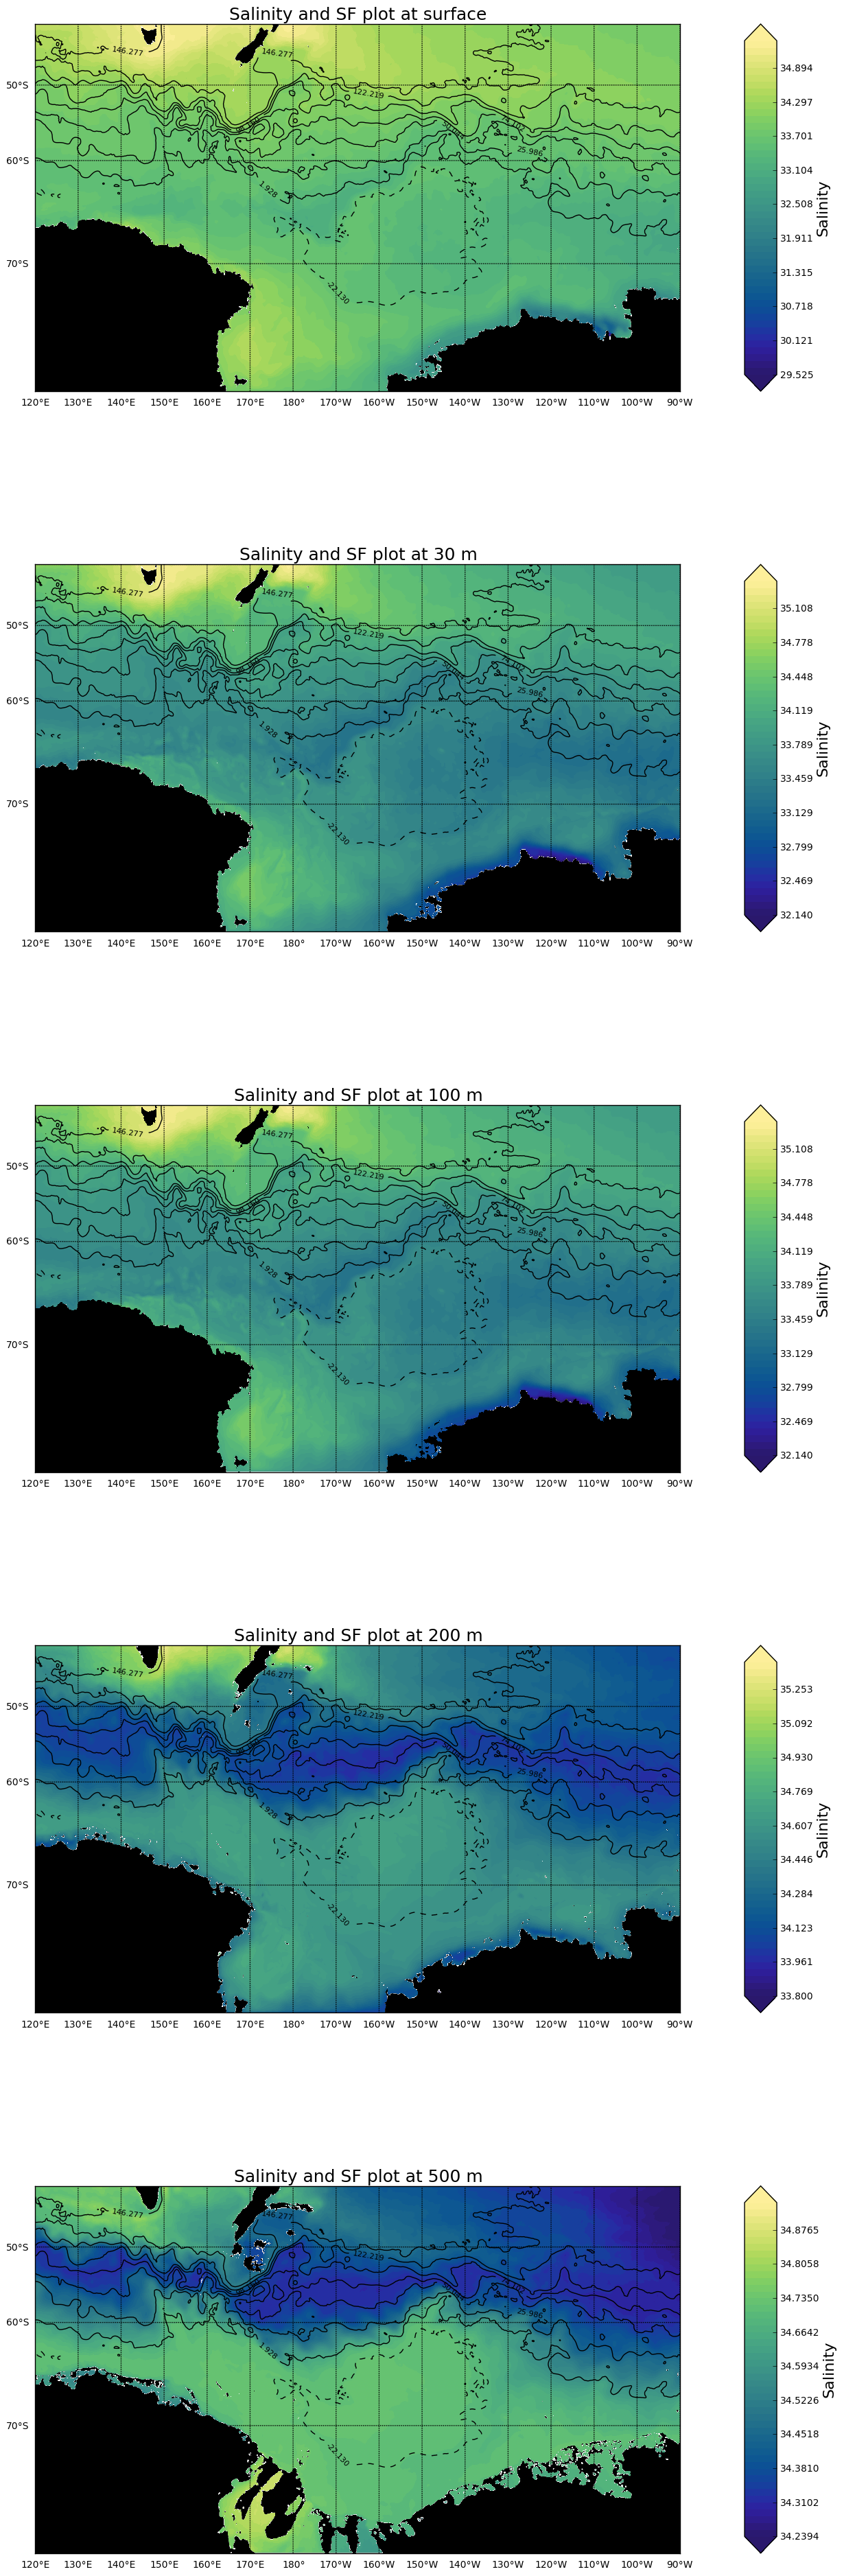

In [12]:
fig     = plt.figure(figsize=(12,40))

plt.subplot(5,1,1)
background_SF(proj='merc', background='salt', field=mean_Salt_surf, hfacc_level=0, title_fig='Salinity and SF plot at surface', color='k')
plt.subplot(5,1,2)
background_SF(proj='merc', background='salt', field=mean_Salt_30,   hfacc_level=9, title_fig='Salinity and SF plot at 30 m', color='k')
plt.subplot(5,1,3)
background_SF(proj='merc', background='salt', field=mean_Salt_100, hfacc_level=24, title_fig='Salinity and SF plot at 100 m', color='k')
plt.subplot(5,1,4)
background_SF(proj='merc', background='salt', field=mean_Salt_200, hfacc_level=39, title_fig='Salinity and SF plot at 200 m', color='k')
plt.subplot(5,1,5)
background_SF(proj='merc', background='salt', field=mean_Salt_500, hfacc_level=59, title_fig='Salinity and SF plot at 500 m', color='k')

fig.tight_layout()

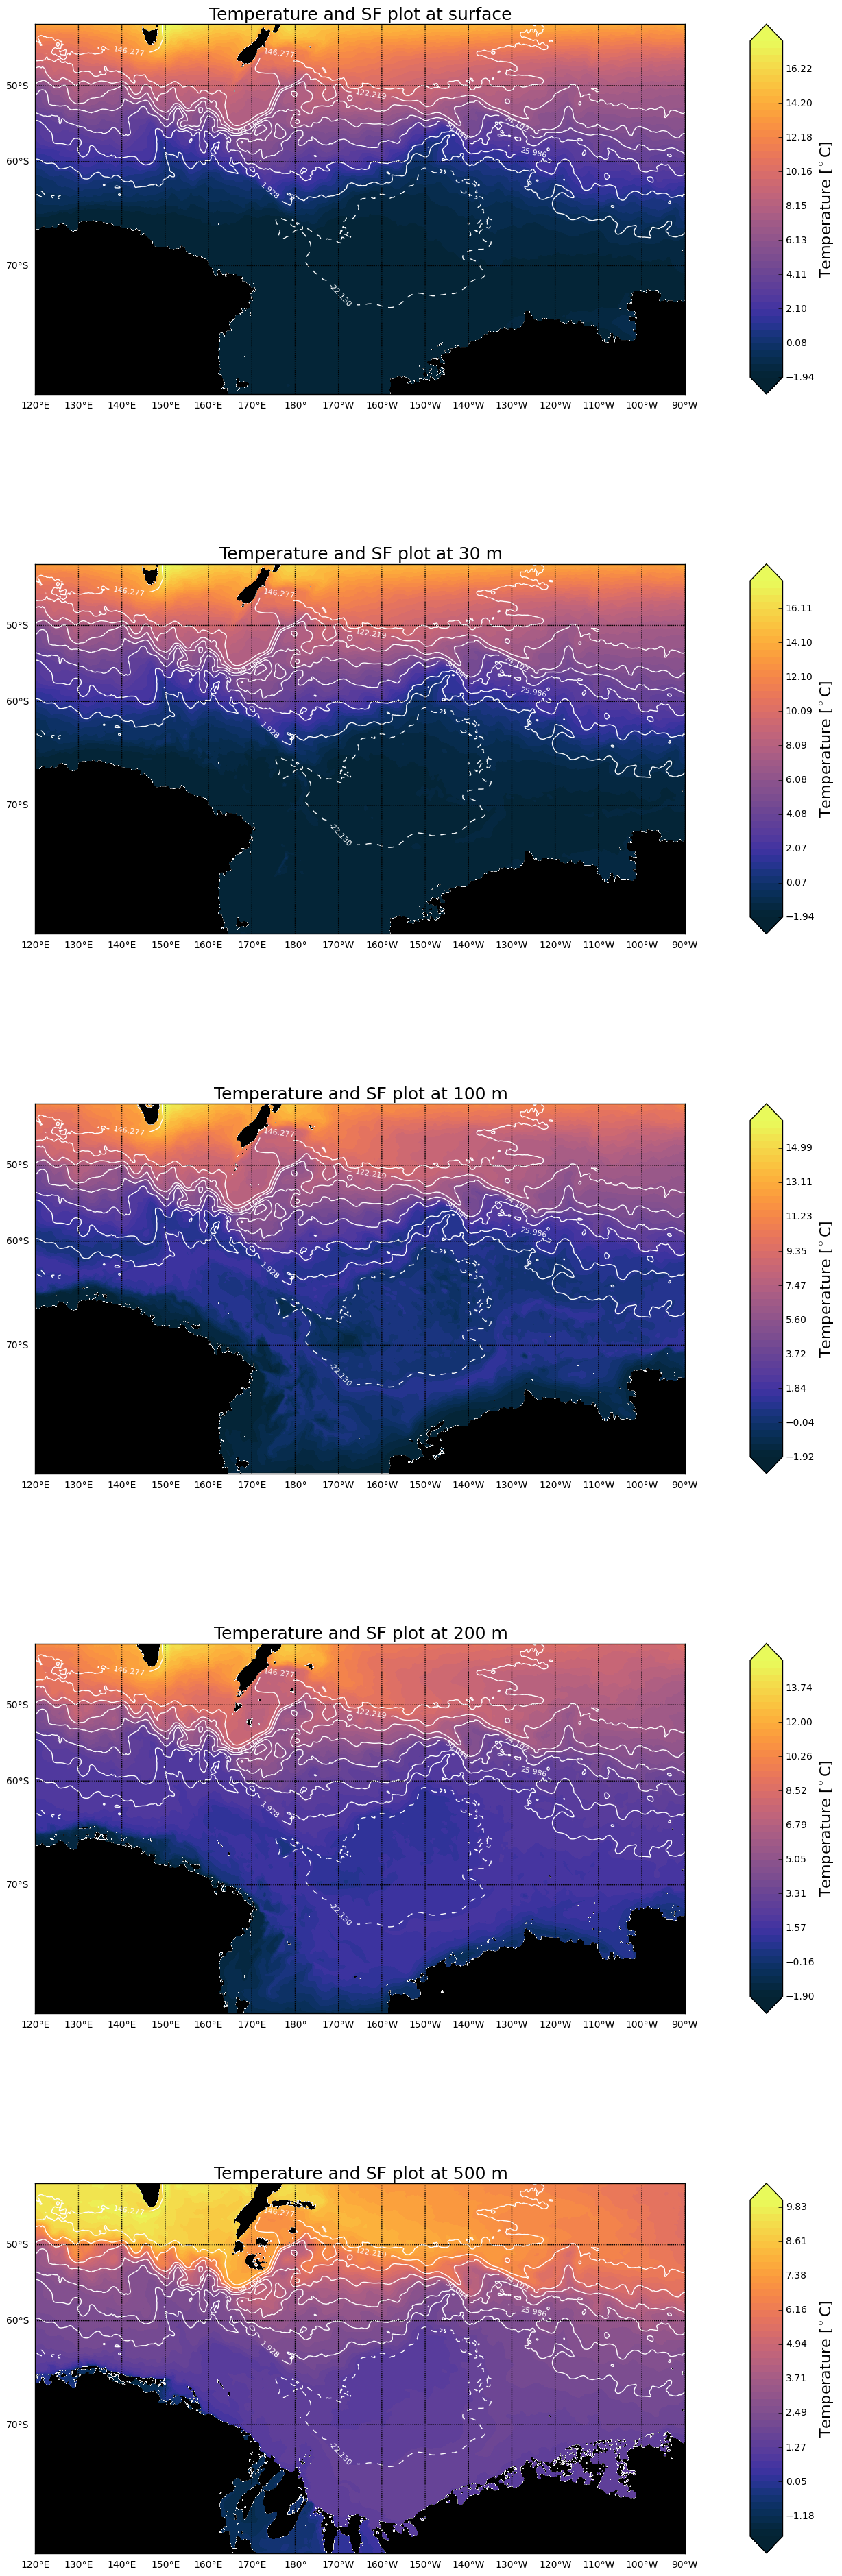

In [13]:
fig     = plt.figure(figsize=(12,40))

plt.subplot(5,1,1)
background_SF(proj='merc', background='temp', field=mean_Theta_surf, hfacc_level=0, title_fig='Temperature and SF plot at surface', color='w')
plt.subplot(5,1,2)
background_SF(proj='merc', background='temp', field=mean_Theta_30,   hfacc_level=9, title_fig='Temperature and SF plot at 30 m', color='w')
plt.subplot(5,1,3)
background_SF(proj='merc', background='temp', field=mean_Theta_100, hfacc_level=24, title_fig='Temperature and SF plot at 100 m', color='w')
plt.subplot(5,1,4)
background_SF(proj='merc', background='temp', field=mean_Theta_200, hfacc_level=39, title_fig='Temperature and SF plot at 200 m', color='w')
plt.subplot(5,1,5)
background_SF(proj='merc', background='temp', field=mean_Theta_500, hfacc_level=59, title_fig='Temperature and SF plot at 500 m', color='w')

fig.tight_layout()

In [ ]:
fig     = plt.figure(figsize=(40,50))

plt.subplot(5,3,1)
background_SF(proj='merc', background='speed', field=norm_surf, hfacc_level=0, title_fig='Speed and SF plot at surface', color='k')
plt.subplot(5,3,4)
background_SF(proj='merc', background='speed', field=norm_30,   hfacc_level=9, title_fig='Speed and SF plot at 30 m', color='k')
plt.subplot(5,3,7)
background_SF(proj='merc', background='speed', field=norm_100, hfacc_level=24, title_fig='Speed and SF plot at 100 m', color='k')
plt.subplot(5,3,10)
background_SF(proj='merc', background='speed', field=norm_200, hfacc_level=39, title_fig='Speed and SF plot at 200 m', color='k')
plt.subplot(5,3,13)
background_SF(proj='merc', background='speed', field=norm_500, hfacc_level=59, title_fig='Speed and SF plot at 500 m', color='k')


plt.subplot(5,3,2)
background_SF(proj='merc', background='salt', field=mean_Salt_surf, hfacc_level=0, title_fig='Salinity and SF plot at surface', color='k')
plt.subplot(5,3,5)
background_SF(proj='merc', background='salt', field=mean_Salt_30,   hfacc_level=9, title_fig='Salinity and SF plot at 30 m', color='k')
plt.subplot(5,3,8)
background_SF(proj='merc', background='salt', field=mean_Salt_100, hfacc_level=24, title_fig='Salinity and SF plot at 100 m', color='k')
plt.subplot(5,3,11)
background_SF(proj='merc', background='salt', field=mean_Salt_200, hfacc_level=39, title_fig='Salinity and SF plot at 200 m', color='k')
plt.subplot(5,3,14)
background_SF(proj='merc', background='salt', field=mean_Salt_500, hfacc_level=59, title_fig='Salinity and SF plot at 500 m', color='k')


plt.subplot(5,3,3)
background_SF(proj='merc', background='temp', field=mean_Theta_surf, hfacc_level=0, title_fig='Temperature and SF plot at surface', color='w')
plt.subplot(5,3,6)
background_SF(proj='merc', background='temp', field=mean_Theta_30,   hfacc_level=9, title_fig='Temperature and SF plot at 30 m', color='w')
plt.subplot(5,3,9)
background_SF(proj='merc', background='temp', field=mean_Theta_100, hfacc_level=24, title_fig='Temperature and SF plot at 100 m', color='w')
plt.subplot(5,3,12)
background_SF(proj='merc', background='temp', field=mean_Theta_200, hfacc_level=39, title_fig='Temperature and SF plot at 200 m', color='w')
plt.subplot(5,3,15)
background_SF(proj='merc', background='temp', field=mean_Theta_500, hfacc_level=59, title_fig='Temperature and SF plot at 500 m', color='w')

fig.tight_layout()